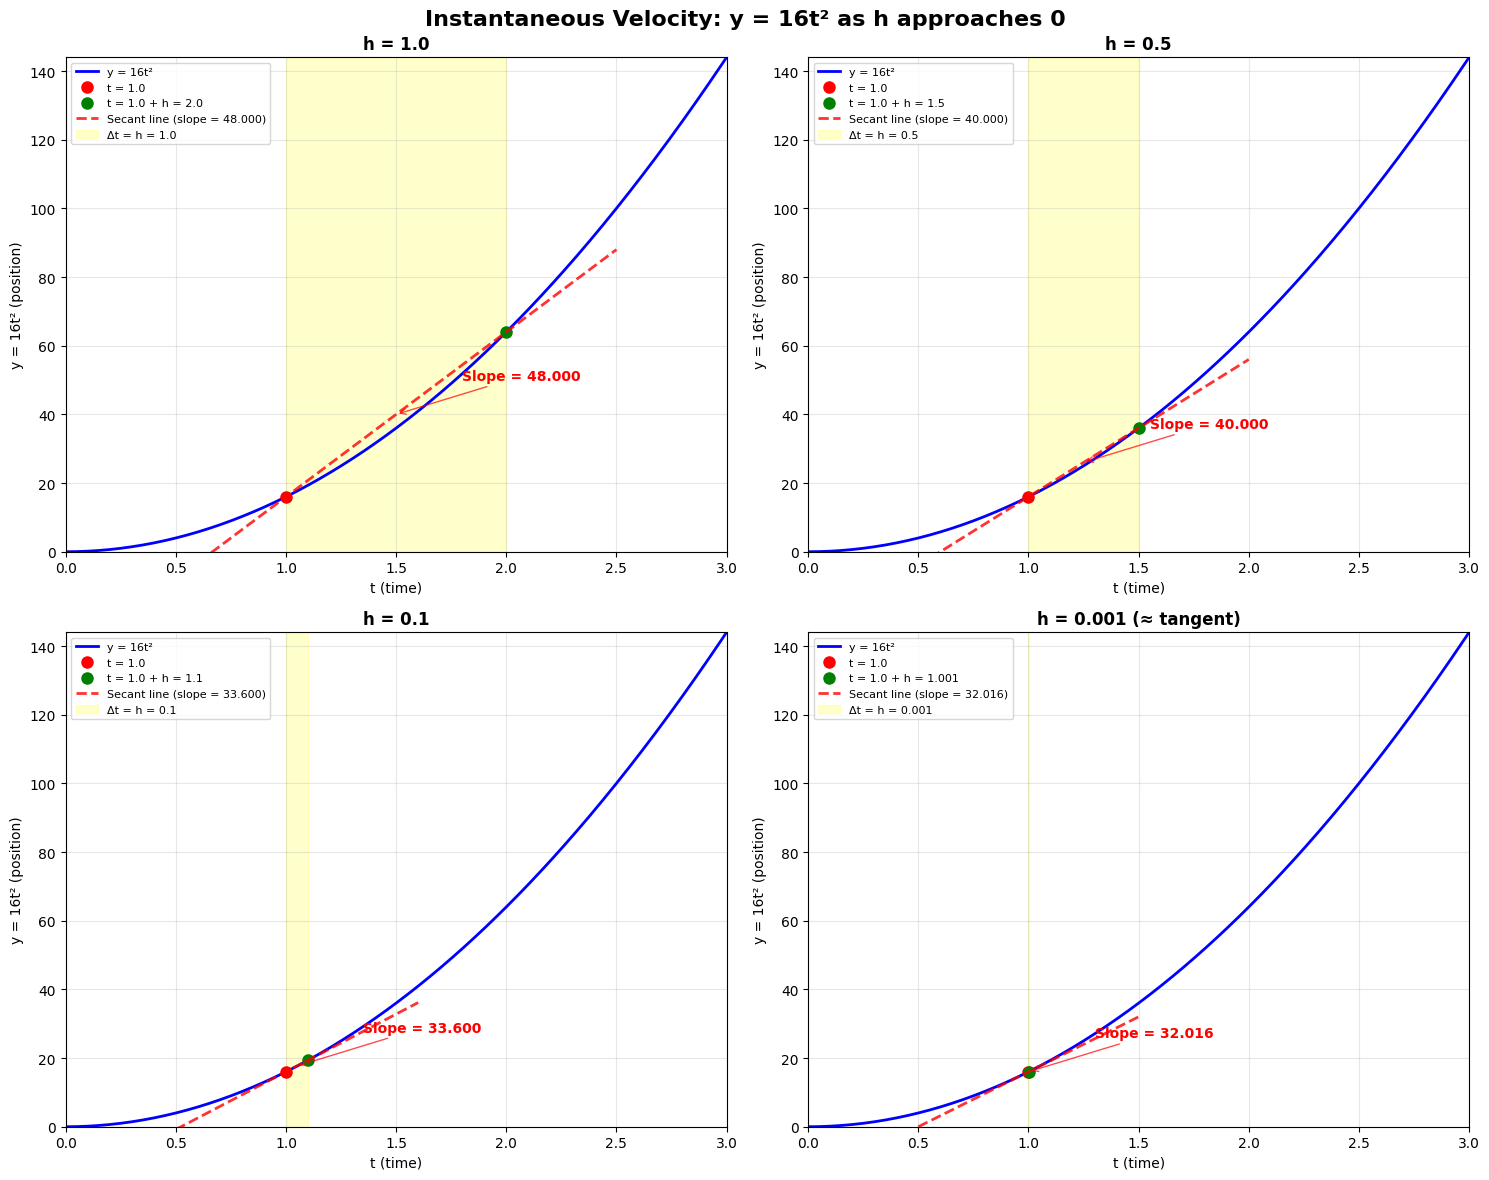


Analytical result:
The derivative of y = 16t² at t = 1.0 is: dy/dt = 32t = 32(1.0) = 32.0

As h approaches 0, the secant line slopes approach the instantaneous velocity: 32.0

Numerical convergence:
h = 1.0000, slope =  48.0000, error = 16.000000
h = 0.5000, slope =  40.0000, error = 8.000000
h = 0.1000, slope =  33.6000, error = 1.600000
h = 0.0100, slope =  32.1600, error = 0.160000
h = 0.0010, slope =  32.0160, error = 0.016000
h = 0.0001, slope =  32.0016, error = 0.001600


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches

# Define the function y = 16*t^2
def f(t):
    return 16 * t**2

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Instantaneous Velocity: y = 16t² as h approaches 0', fontsize=16, fontweight='bold')

# Define the point where we want to find instantaneous velocity
t0 = 1.0

# Define h values (decreasing)
h_values = [1.0, 0.5, 0.1, 0.001]
titles = ['h = 1.0', 'h = 0.5', 'h = 0.1', 'h = 0.001 (≈ tangent)']

# Create t values for smooth curve
t = np.linspace(0, 3, 300)
y = f(t)

axes = [ax1, ax2, ax3, ax4]

for i, (ax, h, title) in enumerate(zip(axes, h_values, titles)):
    # Plot the main function
    ax.plot(t, y, 'b-', linewidth=2, label='y = 16t²')
    
    # Points for secant line
    t1 = t0
    t2 = t0 + h
    y1 = f(t1)
    y2 = f(t2)
    
    # Plot points
    ax.plot(t1, y1, 'ro', markersize=8, label=f't = {t1}')
    ax.plot(t2, y2, 'go', markersize=8, label=f't = {t1} + h = {t2}')
    
    # Calculate and plot secant line
    slope = (y2 - y1) / (t2 - t1)
    
    # Extend secant line
    t_secant = np.linspace(max(0, t1 - 0.5), min(3, t2 + 0.5), 100)
    y_secant = y1 + slope * (t_secant - t1)
    
    ax.plot(t_secant, y_secant, 'r--', linewidth=2, alpha=0.8, 
            label=f'Secant line (slope = {slope:.3f})')
    
    # Add slope annotation
    ax.annotate(f'Slope = {slope:.3f}', 
                xy=(t1 + h/2, (y1 + y2)/2), 
                xytext=(t1 + h/2 + 0.3, (y1 + y2)/2 + 10),
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                fontsize=10, color='red', fontweight='bold')
    
    # Highlight the interval
    ax.axvspan(t1, t2, alpha=0.2, color='yellow', label=f'Δt = h = {h}')
    
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 144)
    ax.set_xlabel('t (time)')
    ax.set_ylabel('y = 16t² (position)')
    ax.set_title(title, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8, loc='upper left')

plt.tight_layout()
plt.show()

# Calculate theoretical derivative at t = 1
theoretical_derivative = 32 * t0  # d/dt(16t²) = 32t
print(f"\nAnalytical result:")
print(f"The derivative of y = 16t² at t = {t0} is: dy/dt = 32t = 32({t0}) = {theoretical_derivative}")
print(f"\nAs h approaches 0, the secant line slopes approach the instantaneous velocity: {theoretical_derivative}")

# Show convergence numerically
print(f"\nNumerical convergence:")
for h in [1.0, 0.5, 0.1, 0.01, 0.001, 0.0001]:
    slope = (f(t0 + h) - f(t0)) / h
    error = abs(slope - theoretical_derivative)
    print(f"h = {h:6.4f}, slope = {slope:8.4f}, error = {error:8.6f}")

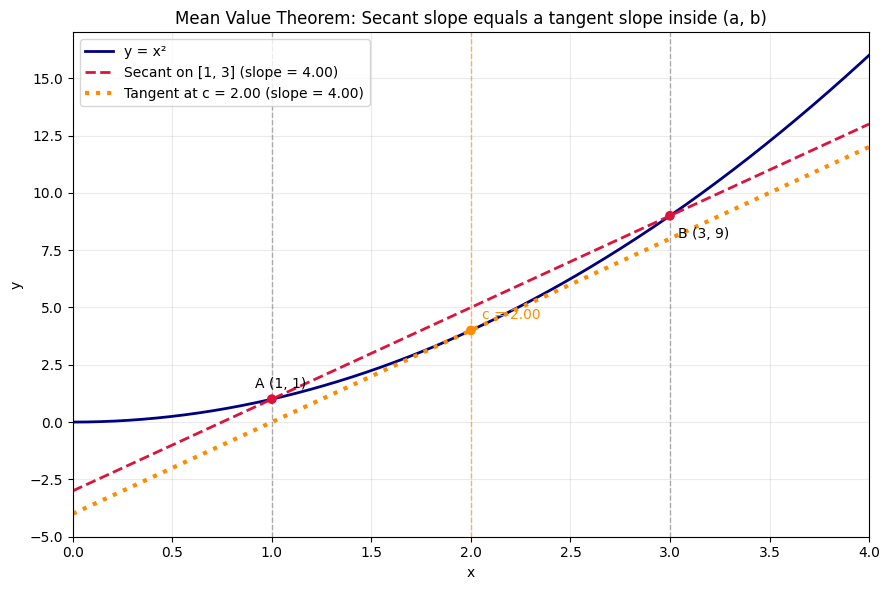

Average rate on [1.0, 3.0] = (f(b)-f(a))/(b-a) = 4.0000
Point c in (1.0, 3.0) with matching slope: c = 2.0000


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function and its derivative for reference
f = lambda x: x**2
fp = lambda x: 2*x

# Interval [a, b]
a, b = 1.0, 3.0

# Secant slope (average rate of change)
m = (f(b) - f(a)) / (b - a)

# For f(x)=x^2, f'(c)=2c, so choose c inside (a,b) with 2c = m -> c = m/2 = (a+b)/2
c = m / 2.0

# Domain for plotting
x = np.linspace(a - 1, b + 1, 400)

# Lines
y = f(x)
y_secant  = f(a) + m * (x - a)
y_tangent = f(c) + m * (x - c)

plt.figure(figsize=(9, 6))
plt.plot(x, y, color='navy', lw=2, label='y = x²')
plt.plot(x, y_secant, '--', color='crimson', lw=2,
         label=f'Secant on [{a:.0f}, {b:.0f}] (slope = {m:.2f})')
plt.plot(x, y_tangent, ':', color='darkorange', lw=3,
         label=f'Tangent at c = {c:.2f} (slope = {m:.2f})')

# Key points and guides
plt.scatter([a, b, c], [f(a), f(b), f(c)],
            color=['crimson', 'crimson', 'darkorange'], zorder=3)
plt.axvline(a, color='gray', ls='--', lw=1, alpha=0.6)
plt.axvline(b, color='gray', ls='--', lw=1, alpha=0.6)
plt.axvline(c, color='darkorange', ls='--', lw=1, alpha=0.6)

plt.annotate(f"A ({a:.0f}, {f(a):.0f})", (a, f(a)), textcoords='offset points', xytext=(-12, 8))
plt.annotate(f"B ({b:.0f}, {f(b):.0f})", (b, f(b)), textcoords='offset points', xytext=(6, -16))
plt.annotate(f"c = {c:.2f}", (c, f(c)), textcoords='offset points', xytext=(8, 8), color='darkorange')

plt.title('Mean Value Theorem: Secant slope equals a tangent slope inside (a, b)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(a - 1, b + 1)
plt.ylim(min(y.min(), y_secant.min(), y_tangent.min()) - 1,
         max(y.max(), y_secant.max(), y_tangent.max()) + 1)
plt.grid(alpha=0.25)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print(f"Average rate on [{a}, {b}] = (f(b)-f(a))/(b-a) = {m:.4f}")
print(f"Point c in ({a}, {b}) with matching slope: c = {c:.4f}")

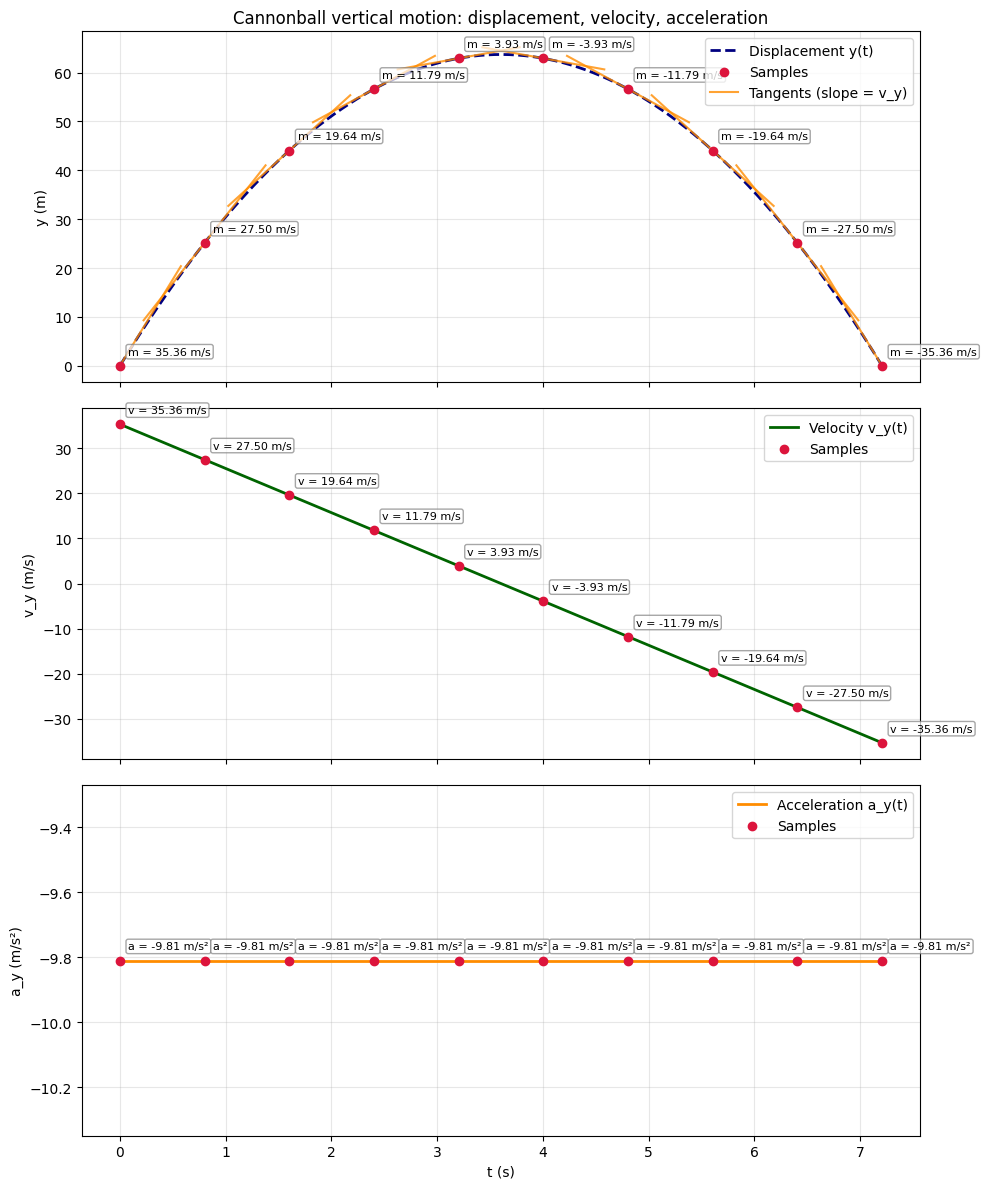

Quadratic displacement (vertical):
y(t) = 0.000 + (35.355) t + (-4.905) t^2  
General form: y(t) = y0 + (v0 sinθ) t - 1/2 g t^2

Time of flight: 7.208 s  |  Time to peak: 3.604 s  |  Peak height: 63.710 m


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the cannon ball (you can tweak these)
g = 9.81            # m/s^2 (acceleration due to gravity)
v0 = 50.0           # m/s (launch speed)
angle_deg = 45.0    # degrees (launch angle above horizontal)
y0 = 0.0            # m (initial height)

# Components and helpers
angle = np.deg2rad(angle_deg)
v0x = v0 * np.cos(angle)
v0y = v0 * np.sin(angle)

# Time of flight (solve y(t) = 0 for t > 0): y0 + v0y t - 1/2 g t^2 = 0
# General quadratic solution: t = (v0y + sqrt(v0y^2 + 2 g y0)) / g
# If y0 = 0, this reduces to t_flight = 2 v0y / g
under_sqrt = v0y**2 + 2*g*y0
t_flight = (v0y + np.sqrt(under_sqrt)) / g

# Time vector and kinematics
T = np.linspace(0, t_flight, 400)
y = y0 + v0y*T - 0.5*g*T**2          # displacement (vertical)
vy = v0y - g*T                        # velocity (vertical)
ay = -g * np.ones_like(T)            # acceleration (vertical)

# Discrete sample points to match "displacement at different instants"
sample_T = np.linspace(0, t_flight, 10)
sample_y = y0 + v0y*sample_T - 0.5*g*sample_T**2
sample_v = v0y - g*sample_T          # instantaneous slope (velocity)
sample_a = -g * np.ones_like(sample_T)  # acceleration values at sample points

# Plot: displacement, velocity, acceleration
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# 1) Displacement vs time
ax1 = axes[0]
ax1.plot(T, y, '--', color='navy', lw=2, label='Displacement y(t)')
ax1.scatter(sample_T, sample_y, color='crimson', zorder=3, label='Samples')

# Draw short tangent segments and annotate slope at each sampled point
window = 0.08 * t_flight  # half-width around each sample for tangent segment
added_label = False
for ti, yi, mi in zip(sample_T, sample_y, sample_v):
    t_left = max(0.0, ti - window)
    t_right = min(t_flight, ti + window)
    t_seg = np.linspace(t_left, t_right, 20)
    y_seg = yi + mi * (t_seg - ti)
    lbl = 'Tangents (slope = v_y)' if not added_label else None
    ax1.plot(t_seg, y_seg, color='darkorange', lw=1.5, alpha=0.8, label=lbl)
    # Annotate slope value near the point
    ax1.annotate(f"m = {mi:.2f} m/s", xy=(ti, yi), xytext=(6, 8), textcoords='offset points',
                 fontsize=8, color='black', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='gray', alpha=0.7))
    added_label = True

ax1.set_ylabel('y (m)')
ax1.set_title('Cannonball vertical motion: displacement, velocity, acceleration')
ax1.grid(alpha=0.3)
ax1.legend(loc='upper right')

# 2) Velocity vs time
ax2 = axes[1]
ax2.plot(T, vy, color='darkgreen', lw=2, label='Velocity v_y(t)')
ax2.scatter(sample_T, sample_v, color='crimson', zorder=3, label='Samples')

# Annotate velocity values at each sampled point
for ti, vi in zip(sample_T, sample_v):
    ax2.annotate(f"v = {vi:.2f} m/s", xy=(ti, vi), xytext=(6, 8), textcoords='offset points',
                 fontsize=8, color='black', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='gray', alpha=0.7))

ax2.set_ylabel('v_y (m/s)')
ax2.grid(alpha=0.3)
ax2.legend(loc='upper right')

# 3) Acceleration vs time
ax3 = axes[2]
ax3.plot(T, ay, color='darkorange', lw=2, label='Acceleration a_y(t)')
ax3.scatter(sample_T, sample_a, color='crimson', zorder=3, label='Samples')

# Annotate acceleration values (slope of velocity) at each sampled point
for ti, ai in zip(sample_T, sample_a):
    ax3.annotate(f"a = {ai:.2f} m/s²", xy=(ti, ai), xytext=(6, 8), textcoords='offset points',
                 fontsize=8, color='black', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='gray', alpha=0.7))

ax3.set_xlabel('t (s)')
ax3.set_ylabel('a_y (m/s²)')
ax3.grid(alpha=0.3)
ax3.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Quadratic displacement equation (numerical form)
A = -0.5 * g
B = v0y
C = y0
print('Quadratic displacement (vertical):')
print(f"y(t) = {C:.3f} + ({B:.3f}) t + ({A:.3f}) t^2  ")
print('General form: y(t) = y0 + (v0 sinθ) t - 1/2 g t^2')

# Some useful derived quantities
t_peak = v0y / g
y_peak = y0 + v0y*t_peak - 0.5*g*t_peak**2
print(f"\nTime of flight: {t_flight:.3f} s  |  Time to peak: {t_peak:.3f} s  |  Peak height: {y_peak:.3f} m")